Code compiled and Modified for UMGC DATA 620  by: Evan Brody 
April 26, 20202
Assignment 12.1
Dr. Carrie Beam

The code asks user to enter the file name of text files.  It was designed to process annual report data from 2019, 2014, 2009, 2001, and 1999 in the above order using the files: BOA19.txt, BOA14.txt, BOA09.txt, BOA04.txt and BOA99.txt.  The text files are then striped of punctuation, converted to lower case, striped of common stop words and lematized. The words are then counted.  The program returns to the user the total number of characters, lines, words and a list many common words, their rank and count.  The code captures the 30 top words for each text file entered as these are the words to be analyzed.  These words are stored in a pandas data frame in two different formats and two csv files are produced to store the data called wordcounts1.csv and wordcounts2.csv.  Both of these files were used to visualize the data with Tableau and the two different formats allowed for different visualizations.  Figure 1 was created with wordcounts1 and the other figures with wordscounts2. The program also shows one line chart visualizing the word counts of the top 30 words from each year. 
This code assumes the following python packages have been installed: Pandas, Matplotlib, nltk

In addition the code assumes the following code has been run at least once to download relevant data previous to running this program:

nltk.download('wordnet')

nltk.download('stopwords')


In [1]:
# import system module to help exit if error occurs 
import sys
# ask user for file name and encode with UTF 8 so all characters can be read 
file = input('enter the file name: ')
try:
    fhand = open(file, encoding='utf-8')
    # return an error message and exit if file cannot be read properly
except:
    print('Error: file could not be opened')
    sys.exit()

enter the file name: BOA19.txt


In [2]:
# read file into a variable
try:
    t = fhand.read()
# print error message if file cannot be read properly and exit program
except:
    print('Error: file could not be read, some characters may not be compatible')
    sys.exit()


In [3]:
# code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347)
#
# Modified for UMGC DATA 620 by Dr. Carrie Beam and Evan Brody
# show user total characters and lines of file used 
print('The file had', len(t), 'total characters.')
print('The file had', t.count('\n'), 'total lines.')

The file had 844322 total characters.
The file had 18223 total lines.


In [4]:
# code code Based on Udemy course: Python for Data Science and Machine Learning Bootcamp
# Created by Jose Portilla
#  Modified for UMGC DATA 620 by Evan Brody
import string

# Check characters to see if they are in punctuation and only grab non punctuation characters
nopunc = [char for char in t if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [5]:
# split the long string into words and show user the count
words = nopunc.split()
print('there are', len(words), 'words in the file before any stopwords are removed')
# convert words to lower case so no repetition of lower and upper case words
words = [w.lower() for w in words]

# code Based on Lynda.com Python for Data Science Essential Training Part 1 with Lillian Pierson
#  Modified for UMGC DATA 620 by Evan Brody
# import list of common stopwords
from nltk.corpus import stopwords
# create set of all stopwords
sw = set(stopwords.words("english"))
# code Based on Dr. Carrie Beam for UMGC DATA 620 modified by Evan Brody
# Append our own stop words to this list based on context of BOA common words from this year
sw.add("america")
sw.add('2018')
sw.add('—')
sw.add('2019')
# make list of words which aren't stopwords
fwords = [w for w in words if w not in sw]


there are 127174 words in the file before any stopwords are removed


In [6]:
# code Based on Lynda.com Python for Data Science Essential Training Part 1 with Lillian Pierson
#  Modified for UMUG DATA 620 by Evan Brody
# import word lemmatizer and set to variable
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
# create empty list
lemm_words = []
# iterate through the list and lematize each word and add it to the list
for i in range(len(fwords)):
    lemm_words.append(lem.lemmatize(fwords[i]))
    
#print(lemm_words)

In [7]:
# code Based on Lynda.com Python for Data Science Essential Training Part 1 with Lillian Pierson
#  Modified for UMUG DATA 620 by Evan Brody
# use automaticed frequency distribution to creat dictionary of word counts and show user how many words and unique words there are
from nltk.probability import FreqDist
fd = FreqDist(lemm_words)
print(fd)

# code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347)
#
# Modified for UMGC DATA 620 by Dr. Carrie Beam and Evan Brody
# create list of word and counts sort starting with highest
lst = [(fd[w], w) for w in fd]
lst = sorted(lst, reverse= True)



# show user the 100 most common words even though only top 30 words were analyzed
# in a few cases some words which were top 30 words in other years did not make the list of top thirty words in all years
# this print out shows the user how those words faired in this year
print('\n The 100 most frequent words are: \n')

i = 1
for count, word in lst[:100]:
    print('%2s.  %4s %s' % (i, count, word))
    i += 1
    

<FreqDist with 9945 samples and 86172 outcomes>

 The 100 most frequent words are: 

 1.  1190 loan
 2.   737 billion
 3.   719 bank
 4.   700 credit
 5.   697 value
 6.   680 total
 7.   646 million
 8.   643 asset
 9.   639 risk
10.   614 security
11.   601 corporation
12.   564 1
13.   559 31
14.   554 december
15.   526 loss
16.   523 net
17.   502 fair
18.   487 income
19.   469 financial
20.   467 lease
21.   447 interest
22.   427 commercial
23.   408 consumer
24.   397 rate
25.   394 market
26.   377 business
27.   373 debt
28.   364 2
29.   352 equity
30.   344 capital
31.   342 derivative
32.   337 portfolio
33.   328 management
34.   307 3
35.   306 liability
36.   303 u
37.   257 certain
38.   256 banking
39.   253 investment
40.   250 trading
41.   250 table
42.   248 activity
43.   241 client
44.   241 cash
45.   236 including
46.   233 global
47.   232 note
48.   231 change
49.   230 year
50.   229 percent
51.   225 mortgage
52.   224 allowance
53.   223 –
54.   221 bala

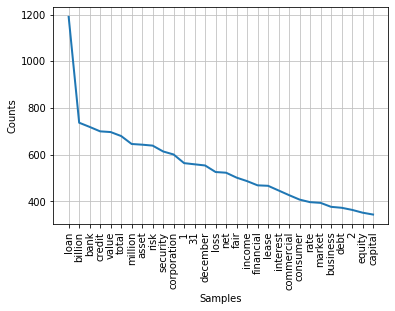

In [8]:
# code Based on Lynda.com Python for Data Science Essential Training Part 1 with Lillian Pierson
#  Modified for UMUG DATA 620 by Evan Brody
# visualize the word count of top 30 words
import matplotlib.pyplot as plt
%matplotlib inline
fd.plot(30, cumulative=False)
plt.show()

In [9]:
# use pandas to create a data frame to capture the 30 most common words
import pandas as pd
df= pd.DataFrame()
# create column rank numbered 1-30
df['rank'] = range(1,31)

In [10]:
# create column word with 30 top words
df['word']= [word for num, word in lst[:30]]

In [11]:
# create columns count and year with count of 30 top words
df['count'] = [num for num, word in lst[:30]]
df['year'] = '2019'

In [12]:
# create a 2nd data frame and add the data in a different format
dfa= pd.DataFrame()
# add 3 columns to the new data frame the first one is rank a list of numbers from 1 to 30
dfa['rank'] = range(1,31)
# add the 2019 words to a new column in the order of their rank
dfa['word_2019']= [word for num, word in lst[:30]]
# add the count of the 2019 words in a new column
dfa['count_2019'] = [num for num, word in lst[:30]]

The code now repeats the above in order to process a second text file of data from a different year.  Since it is almost an exact repitition the comments have been abreviated. The source of the code has been noted above.  

enter the file name: BOA14.txt
The file had 1169025 total characters.
The file had 20696 total lines.
there are 176771 words in the file before stop words are removed
<FreqDist with 10325 samples and 119224 outcomes>

 The 100 most frequent words are: 

 1.  2241 loan
 2.  1148 billion
 3.  1060 value
 4.   969 credit
 5.   942 million
 6.   927 asset
 7.   888 loss
 8.   873 security
 9.   866 corporation
10.   853 1
11.   844 net
12.   843 31
13.   836 total
14.   818 december
15.   816 risk
16.   745 fair
17.   704 interest
18.   690 income
19.   644 portfolio
20.   594 equity
21.   558 bank
22.   557 mortgage
23.   549 lease
24.   542 rate
25.   522 3
26.   520 commercial
27.   504 financial
28.   489 debt
29.   485 consumer
30.   479 u
31.   479 derivative
32.   462 certain
33.   447 2
34.   444 percent
35.   442 capital
36.   436 liability
37.   432 market
38.   405 management
39.   403 balance
40.   396 business
41.   395 –
42.   385 table
43.   372 due
44.   364 change
45.   35

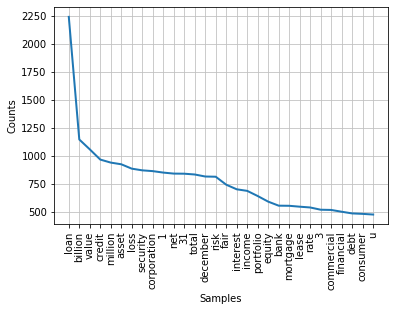

In [13]:

file = input('enter the file name: ')
try:
    fhand = open(file, encoding='utf-8')
except:
    print('Error: file could not be opened')
    sys.exit()

try:
    t = fhand.read()
except:
    print('Error: file could not be read, some characters may not be compatible')
    sys.exit()


# code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347)
#
# Modified for UMUC DATA 620 by Evan Brody

print('The file had', len(t), 'total characters.')
print('The file had', t.count('\n'), 'total lines.')

# code code Based on Udemy
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in t if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

words = nopunc.split()
print('there are', len(words), 'words in the file before stop words are removed')
words = [w.lower() for w in words]

# code Based on Lynda
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))
# Append our own stop words to this list based on common words in file relevant to this year (2014)
sw.add("america")
sw.add('2014')
sw.add('—')
sw.add('2013')

fwords = [w for w in words if w not in sw]


# code Based on Lynda
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

lemm_words = []

for i in range(len(fwords)):
    lemm_words.append(lem.lemmatize(fwords[i]))
    

# code Based on Lynda
from nltk.probability import FreqDist
fd = FreqDist(lemm_words)
print(fd)

#code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347) 

lst = [(fd[w], w) for w in fd]
lst = sorted(lst, reverse= True)


print('\n The 100 most frequent words are: \n')

i = 1
for count, word in lst[:100]:
    print('%2s.  %4s %s' % (i, count, word))
    i += 1
    

fd.plot(30, cumulative=False)
plt.show()

df1= pd.DataFrame()
df1['rank'] = range(1,31)
df1['word']= [word for num, word in lst[:30]]
df1['count'] = [num for num, word in lst[:30]]
df1['year'] = '2014'
# add data to 2nd data frame as well
dfa['word_2014']= [word for num, word in lst[:30]]
dfa['count_2014'] = [num for num, word in lst[:30]]

Third repitition of the code

enter the file name: BOA09.txt
The file had 1105736 total characters.
The file had 16568 total lines.
there are 167247 words in the file before stop words are removed
<FreqDist with 9944 samples and 110699 outcomes>

 The 100 most frequent words are: 

 1.  1697 loan
 2.  1424 billion
 3.   964 credit
 4.   945 corporation
 5.   875 december
 6.   873 value
 7.   872 asset
 8.   854 31
 9.   829 loss
10.   825 income
11.   810 million
12.   797 security
13.   761 net
14.   734 interest
15.   689 total
16.   667 risk
17.   641 fair
18.   612 1
19.   535 market
20.   534 bank
21.   533 commercial
22.   509 equity
23.   501 percent
24.   483 rate
25.   443 portfolio
26.   434 debt
27.   419 merrill
28.   416 certain
29.   407 financial
30.   405 mortgage
31.   400 business
32.   399 lynch
33.   398 investment
34.   396 lease
35.   387 derivative
36.   374 stock
37.   366 amount
38.   360 common
39.   356 2
40.   346 corporation’s
41.   344 due
42.   343 consumer
43.   341 related
44.   34

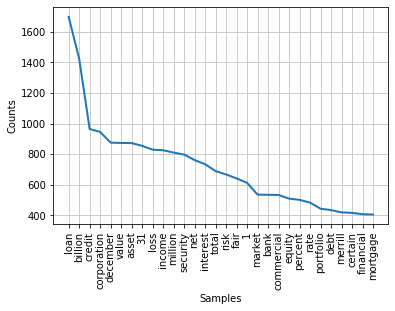

In [14]:
file = input('enter the file name: ')
try:
    fhand = open(file, encoding='utf-8')
except:
    print('Error: file could not be opened')
    sys.exit()

try:
    t = fhand.read()
except:
    print('Error: file could not be read, some characters may not be compatible')
    sys.exit()


# code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347)
#
# Modified for UMUC DATA 620 by Evan Brody

print('The file had', len(t), 'total characters.')
print('The file had', t.count('\n'), 'total lines.')

# code code Based on Udemy
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in t if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

words = nopunc.split()
print('there are', len(words), 'words in the file before stop words are removed')
words = [w.lower() for w in words]

# code Based on Lynda
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))
# Append our own stop words to this list based on context of input file for 2009
sw.add("america")
sw.add('2009')
sw.add('–')
sw.add('2008')

fwords = [w for w in words if w not in sw]


# code Based on Lynda
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

lemm_words = []

for i in range(len(fwords)):
    lemm_words.append(lem.lemmatize(fwords[i]))
    

# code Based on Lynda
from nltk.probability import FreqDist
fd = FreqDist(lemm_words)
print(fd)

#code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347) 

lst = [(fd[w], w) for w in fd]
lst = sorted(lst, reverse= True)


print('\n The 100 most frequent words are: \n')

i = 1
for count, word in lst[:100]:
    print('%2s.  %4s %s' % (i, count, word))
    i += 1
    


fd.plot(30, cumulative=False)
plt.show()

df2= pd.DataFrame()
df2['rank'] = range(1,31)
df2['word']= [word for num, word in lst[:30]]
df2['count'] = [num for num, word in lst[:30]]
df2['year'] = '2009'

dfa['word_2009']= [word for num, word in lst[:30]]
dfa['count_2009'] = [num for num, word in lst[:30]]

Fourth iteration of the same code

enter the file name: BOA09.txt
The file had 1105736 total characters.
The file had 16568 total lines.
there are 167247 words in the file before stop words are removed
<FreqDist with 9944 samples and 113488 outcomes>

 The 100 most frequent words are: 

 1.  1908 2009
 2.  1697 loan
 3.  1424 billion
 4.   964 credit
 5.   945 corporation
 6.   910 2008
 7.   875 december
 8.   873 value
 9.   872 asset
10.   854 31
11.   829 loss
12.   825 income
13.   810 million
14.   797 security
15.   761 net
16.   734 interest
17.   689 total
18.   667 risk
19.   641 fair
20.   612 1
21.   535 market
22.   534 bank
23.   533 commercial
24.   509 equity
25.   501 percent
26.   483 rate
27.   443 portfolio
28.   434 debt
29.   419 merrill
30.   416 certain
31.   407 financial
32.   405 mortgage
33.   400 business
34.   399 lynch
35.   398 investment
36.   396 lease
37.   387 derivative
38.   374 stock
39.   366 amount
40.   360 common
41.   356 2
42.   346 corporation’s
43.   344 due
44.   343 consu

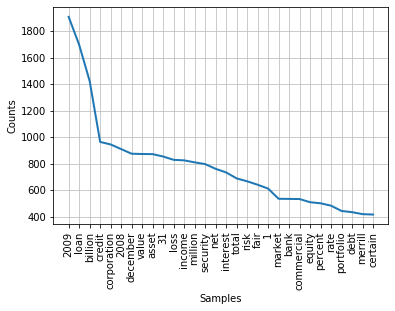

In [15]:
file = input('enter the file name: ')
try:
    fhand = open(file, encoding='utf-8')
except:
    print('Error: file could not be opened')
    sys.exit()

try:
    t = fhand.read()
except:
    print('Error: file could not be read, some characters may not be compatible')
    sys.exit()


# code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347)
#
# Modified for UMUC DATA 620 by Evan Brody

print('The file had', len(t), 'total characters.')
print('The file had', t.count('\n'), 'total lines.')

# code code Based on Udemy
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in t if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

words = nopunc.split()
print('there are', len(words), 'words in the file before stop words are removed')
words = [w.lower() for w in words]

# code Based on Lynda
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))
# Append ewn stop words to this list based on context 
sw.add("america")
sw.add('2004')
sw.add('–')
sw.add('2003')

fwords = [w for w in words if w not in sw]


# code Based on Lynda
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

lemm_words = []

for i in range(len(fwords)):
    lemm_words.append(lem.lemmatize(fwords[i]))
    

# code Based on Lynda
from nltk.probability import FreqDist
fd = FreqDist(lemm_words)
print(fd)

#code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347) 

lst = [(fd[w], w) for w in fd]
lst = sorted(lst, reverse= True)



print('\n The 100 most frequent words are: \n')

i = 1
for count, word in lst[:100]:
    print('%2s.  %4s %s' % (i, count, word))
    i += 1
    


fd.plot(30, cumulative=False)
plt.show()

df3= pd.DataFrame()
df3['rank'] = range(1,31)
df3['word']= [word for num, word in lst[:30]]
df3['count'] = [num for num, word in lst[:30]]
df3['year'] = '2004'

dfa['word_2004']= [word for num, word in lst[:30]]
dfa['count_2004'] = [num for num, word in lst[:30]]

fifth and final input of text file for processing same as above

enter the file name: BOA99.txt
The file had 79195 total characters.
The file had 1926 total lines.
there are 11828 words in the file before stop words are removed
<FreqDist with 2253 samples and 7572 outcomes>

 The 100 most frequent words are: 

 1.   126 service
 2.   120 business
 3.   116 bank
 4.   108 client
 5.   100 customer
 6.    96 banking
 7.    67 product
 8.    61 investment
 9.    61 company
10.    53 management
11.    53 financial
12.    49 u
13.    48 market
14.    40 share
15.    40 percent
16.    39 new
17.    36 small
18.    36 one
19.    34 million
20.    34 billion
21.    33 strategy
22.    32 year
23.    32 corporate
24.    31 corporation
25.    30 solution
26.    30 manager
27.    29 internet
28.    29 income
29.    29 equity
30.    29 commercial
31.    29 asset
32.    29 also
33.    29 account
34.    28 officer
35.    27 common
36.    26 loan
37.    26 credit
38.    25 •
39.    25 value
40.    25 treasury
41.    25 stock
42.    25 security
43.    25 relationshi

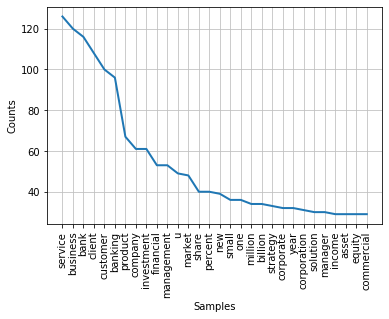

In [16]:
file = input('enter the file name: ')
try:
    fhand = open(file, encoding='utf-8')
except:
    print('Error: file could not be opened')
    sys.exit()

try:
    t = fhand.read()
except:
    print('Error: file could not be read, some characters may not be compatible')
    sys.exit()


# code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347)
#
# Modified for UMUC DATA 620 by Evan Brody

print('The file had', len(t), 'total characters.')
print('The file had', t.count('\n'), 'total lines.')

# code code Based on Udemy
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in t if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

words = nopunc.split()
print('there are', len(words), 'words in the file before stop words are removed')
words = [w.lower() for w in words]

# code Based on Lynda
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))
# Append new stop words 
sw.add("america")
sw.add('1999')
sw.add('—')
sw.add('1998')

fwords = [w for w in words if w not in sw]


# code Based on Lynda
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

lemm_words = []

for i in range(len(fwords)):
    lemm_words.append(lem.lemmatize(fwords[i]))
    

# code Based on Lynda
from nltk.probability import FreqDist
fd = FreqDist(lemm_words)
print(fd)

#code Based on Toby Donaldson's Python: Visual QuickStart Guide
# function print_file_stats (location 5347) 

lst = [(fd[w], w) for w in fd]
lst = sorted(lst, reverse= True)


print('\n The 100 most frequent words are: \n')

i = 1
for count, word in lst[:100]:
    print('%2s.  %4s %s' % (i, count, word))
    i += 1
    

import matplotlib.pyplot as plt
#%matplotlib inline
fd.plot(30, cumulative=False)
plt.show()

df4= pd.DataFrame()
df4['rank'] = range(1,31)
df4['word']= [word for num, word in lst[:30]]
df4['count'] = [num for num, word in lst[:30]]
df4['year'] = '1999'

dfa['word_1999']= [word for num, word in lst[:30]]
dfa['count_1999'] = [num for num, word in lst[:30]]

In [17]:
# save the format of data horizontally to a csv file 
dfa.to_csv('wordcounts1.csv')


In [18]:
# concatenate all the dataframes into one big data frame with data stacked vertically in the 2nd format and show preview
df5 = pd.concat([df, df1, df2, df3,df4]) 
print(df5)

    rank        word  count  year
0      1        loan   1190  2019
1      2     billion    737  2019
2      3        bank    719  2019
3      4      credit    700  2019
4      5       value    697  2019
..   ...         ...    ...   ...
25    26     manager     30  1999
26    27    internet     29  1999
27    28      income     29  1999
28    29      equity     29  1999
29    30  commercial     29  1999

[150 rows x 4 columns]


In [19]:
# save the data as a csv file containing the top 30 words for each year 
# a few additional words and counts were added manually to the csv file using excel
# if a word appeared in the top 30 in one year and not in other years
# and the data was required to follow the trajectory of the word 
df5.to_csv('wordcounts2.csv')
